In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("../data/processed_data.csv")

In [3]:
df

,equipment_energy_consumption,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,...,day,month,weekday,avg_temp,avg_humidity,temp_humidity_interaction,zone_temp_mean,zone_temp_max,zone_temp_min,zone_temp_std
0,-0.474183,-0.346578,1.945579,0.475459,1.193806,-1.277275,2.318207,1.164231,2.228763,-0.117852,...,-0.466190,-1.710022,-1.065871,-0.422737,1.610511,-0.680822,-0.438359,1.164231,-1.745813,0.948265
1,-0.474183,-0.381506,2.094206,0.410244,1.227278,-1.251821,2.307904,0.995683,1.994869,-0.214147,...,-0.466190,-1.710022,-1.065871,-0.593778,1.638625,-0.972980,-0.629377,0.995683,-1.745813,0.946381
2,-0.474183,0.031279,2.138478,0.337783,1.266835,-1.309093,2.282146,0.761729,1.953594,-0.214147,...,-0.466190,-1.710022,-1.065871,-0.548271,1.662619,-0.911566,-0.577355,0.761729,-1.687953,0.937810
3,-0.474183,-0.562497,2.138478,0.265322,1.237421,-1.251821,-0.130506,0.542868,1.953594,-0.301689,...,-0.466190,-1.710022,-1.065871,-0.678216,1.433191,-0.972013,-0.717849,0.542868,-1.659023,0.807757
4,-0.893262,-0.657755,2.138478,0.265322,1.257707,-1.251821,-0.130506,0.437211,1.953594,-0.301689,...,-0.466190,-1.710022,-1.065871,-0.700058,1.438732,-1.007196,-0.740173,0.437211,-1.659023,0.785773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,-0.474183,2.412732,-0.521003,1.540636,-0.388494,2.031802,-0.130506,2.479911,-0.438660,1.720520,...,-1.017405,1.800348,0.961755,1.844071,-0.385978,-0.711770,1.853266,2.479911,0.995368,0.500872
4407,-0.474183,2.380979,-0.549464,1.497160,-0.388494,2.031802,-0.236972,2.454755,-0.448119,1.720520,...,-1.017405,1.800348,0.961755,1.807934,-0.406323,-0.734605,1.837423,2.454755,1.009994,0.501108
4408,-0.893262,2.380979,-0.539977,1.448852,-0.395594,2.031802,-0.224379,2.454755,-0.429201,1.720520,...,-1.017405,1.800348,0.961755,1.797663,-0.228783,-0.411275,1.827956,2.454755,0.973096,0.513042
4409,-0.055104,0.031279,-0.066688,1.448852,-0.022334,2.031802,-0.199194,2.454755,-0.438660,1.720520,...,-1.017405,1.800348,0.961755,1.562057,-0.302431,-0.472415,1.567144,2.454755,0.031279,0.742599


# Model Building

In [4]:
# Split features and target

X = df.drop(columns=['equipment_energy_consumption'])
y = df['equipment_energy_consumption']

In [5]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# evaluate the model with RMSE, MAE, and R²

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R²:   {r2:.4f}")
    
    return model

In [7]:
# 1. Linear Regression

lr = LinearRegression()
evaluate_model("Linear Regression", lr, X_train, X_test, y_train, y_test)


Linear Regression Performance:
RMSE: 0.8044
MAE:  0.6137
R²:   0.2385


LinearRegression()

# Performance: Linear Regression performs poorly, explaining only 24% of the variance in the target variable. This is due to the model's simplicity, which might not capture the complexity of non-linear relationships in the data.

In [8]:
# 2. Random Forest Regressor

rf = RandomForestRegressor(random_state=42)
evaluate_model("Random Forest", rf, X_train, X_test, y_train, y_test)


Random Forest Performance:
RMSE: 0.6411
MAE:  0.4694
R²:   0.5163


RandomForestRegressor(random_state=42)

# Performance: Random Forest is the best-performing model so far, explaining 51.63% of the variance. It handles non-linear relationships better than Linear Regression and is less prone to overfitting.

In [9]:
# 3. XGBoost Regressor

xgb = XGBRegressor()
evaluate_model("XGBoost", xgb, X_train, X_test, y_train, y_test)


XGBoost Performance:
RMSE: 0.6704
MAE:  0.4986
R²:   0.4711


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Performance: XGBoost performs decently but slightly worse than Random Forest, explaining 47.11% of the variance. However, it may perform better with hyperparameter tuning.

In [10]:
# 4. Support Vector Regressor (SVR)

svr = SVR()
evaluate_model("Support Vector Regressor (SVR)", svr, X_train, X_test, y_train, y_test)


Support Vector Regressor (SVR) Performance:
RMSE: 0.7204
MAE:  0.5145
R²:   0.3892


SVR()

# Performance: SVR performs the worst, explaining only 38.92% of the variance. It struggles with high-dimensional data and complex, non-linear relationships.

In [11]:
# 5. Gradient Boosting Regressor (GBR)

gbr = GradientBoostingRegressor(random_state=42)
evaluate_model("Gradient Boosting Regressor (GBR)", gbr, X_train, X_test, y_train, y_test)


Gradient Boosting Regressor (GBR) Performance:
RMSE: 0.7027
MAE:  0.5112
R²:   0.4189


GradientBoostingRegressor(random_state=42)

# Performance: GBR performs slightly better than SVR but still lags behind Random Forest, explaining 41.89% of the variance. GBR may benefit from hyperparameter tuning to improve its performance.

# Conclusion:

# Best Model: Random Forest Regressor is the best model, with the highest R² (51.63%). It captures non-linear patterns effectively.
# Worst Model: Support Vector Regressor (SVR) performs the worst, struggling to capture the relationships in the data.
# Middle Performers: XGBoost and Gradient Boosting are better than SVR but still underperform compared to Random Forest.

# Hypertuning by using Randomized Search

In [12]:
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

In [13]:
# xgb_params = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0]
# }

# xgb = XGBRegressor()

In [14]:
gbr_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gbr = GradientBoostingRegressor(random_state=42)

In [15]:
# Run RandomizedSearchCV for each model

def tune_model_randomized(model, param_grid, n_iter=10):
    randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                           n_iter=n_iter, cv=5, scoring='neg_mean_squared_error', random_state=42)
    randomized_search.fit(X_train, y_train)
    print(f"Best parameters for {model}: {randomized_search.best_params_}")
    return randomized_search.best_estimator_

In [16]:
# Find the best models
best_rf_randomized = tune_model_randomized(rf, rf_params)
best_gbr_randomized = tune_model_randomized(gbr, gbr_params)

Best parameters for RandomForestRegressor(random_state=42): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best parameters for GradientBoostingRegressor(random_state=42): {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.1}


# Cross-Validation

In [17]:
from sklearn.model_selection import cross_val_score

def cross_validate_model(model):
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-cv_scores)
    print(f"{model}: Mean RMSE across 5 folds: {np.mean(rmse)}")
    return np.mean(rmse)

In [18]:
# Evaluate models after hyperparameter tuning

cv_rf = cross_validate_model(best_rf_randomized)
cv_gbr = cross_validate_model(best_gbr_randomized)

RandomForestRegressor(n_estimators=200, random_state=42): Mean RMSE across 5 folds: 0.7122859524624394
GradientBoostingRegressor(max_depth=7, n_estimators=300, random_state=42): Mean RMSE across 5 folds: 0.7319138089952746


In [19]:
print("Random Forest RMSE:", (cv_rf * 100))
print("Gradient Boosting RMSE:", (cv_gbr * 100))

Random Forest RMSE: 71.22859524624394
Gradient Boosting RMSE: 73.19138089952746


In [20]:
## Original vs Tuned Value of Random Forest 

rf = RandomForestRegressor(random_state=42)
cv_original_rf = cross_validate_model(rf)
print(f"Original RF RMSE: {cv_original_rf}")
print(f"Tuned RF RMSE: {cv_rf}")

RandomForestRegressor(random_state=42): Mean RMSE across 5 folds: 0.7137142093685586
Original RF RMSE: 0.7137142093685586
Tuned RF RMSE: 0.7122859524624394


In [21]:
## Original vs Tuned Value of Gradient Boosting 

gbr = GradientBoostingRegressor(random_state=42)
cv_original_gbr = cross_validate_model(gbr)
print(f"Original GB RMSE: {cv_original_gbr}")
print(f"Tuned GB RMSE: {cv_gbr}")

GradientBoostingRegressor(random_state=42): Mean RMSE across 5 folds: 0.7662038915898812
Original GB RMSE: 0.7662038915898812
Tuned GB RMSE: 0.7319138089952746


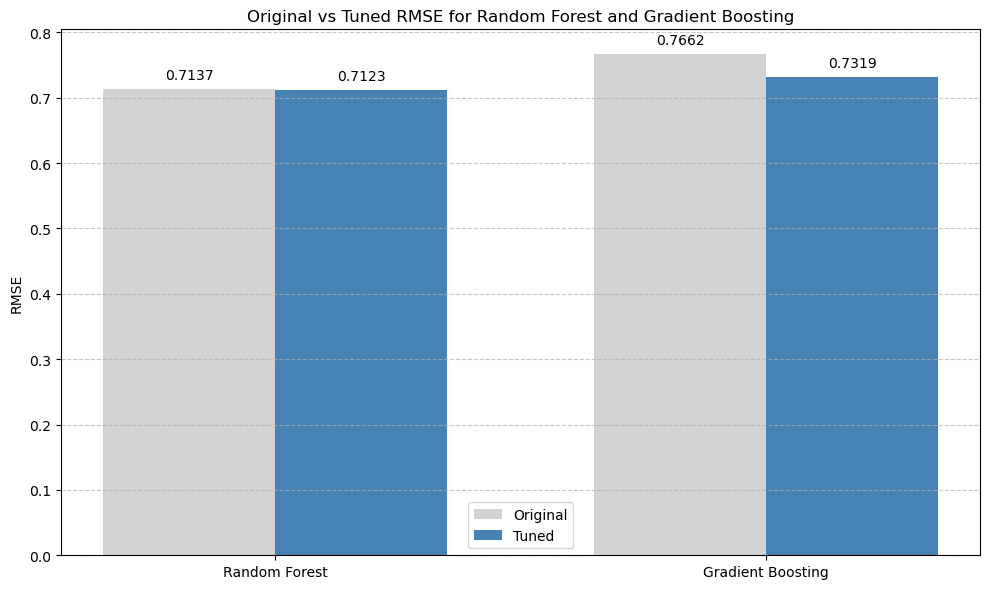

In [24]:
import matplotlib.pyplot as plt

model_rmse_results = {
    'cv_original_rf': cv_original_rf,
    'cv_rf': cv_rf,
    'cv_original_gbr': cv_original_gbr,
    'cv_gbr': cv_gbr
}

models = ['Random Forest', 'Gradient Boosting']
original_rmse = [model_rmse_results['cv_original_rf'], model_rmse_results['cv_original_gbr']]
tuned_rmse = [model_rmse_results['cv_rf'], model_rmse_results['cv_gbr']]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, original_rmse, width, label='Original', color='lightgray')
bars2 = ax.bar(x + width/2, tuned_rmse, width, label='Tuned', color='steelblue')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

ax.set_ylabel('RMSE')
ax.set_title('Original vs Tuned RMSE for Random Forest and Gradient Boosting')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# After performing hyperparameter tuning and cross-validation, the Tuned Random Forest Regressor emerged as the best model with the lowest RMSE of 0.7123, compared to 0.7319 from Gradient Boosting.
# The Random Forest model outperformed Gradient Boosting due to its ability to handle feature interactions and reduce variance effectively without significant overfitting.
# Despite Gradient Boosting improving after tuning, its RMSE remained higher, indicating less accurate predictions.

# Model Evaluation

In [25]:
best_model = best_rf_randomized

# Save model
from joblib import dump
dump(best_model, "best_rf_model.joblib")

['best_rf_model.joblib']

In [26]:
# Predict and evaluate

y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Test Set Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

 Test Set Performance:
RMSE: 0.6424
MAE:  0.4690
R²:   0.5142


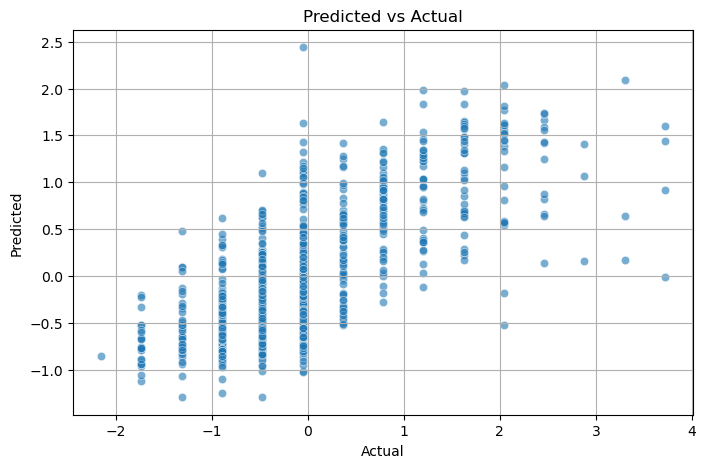

In [29]:
import seaborn as sns

# Predicted vs Actual

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

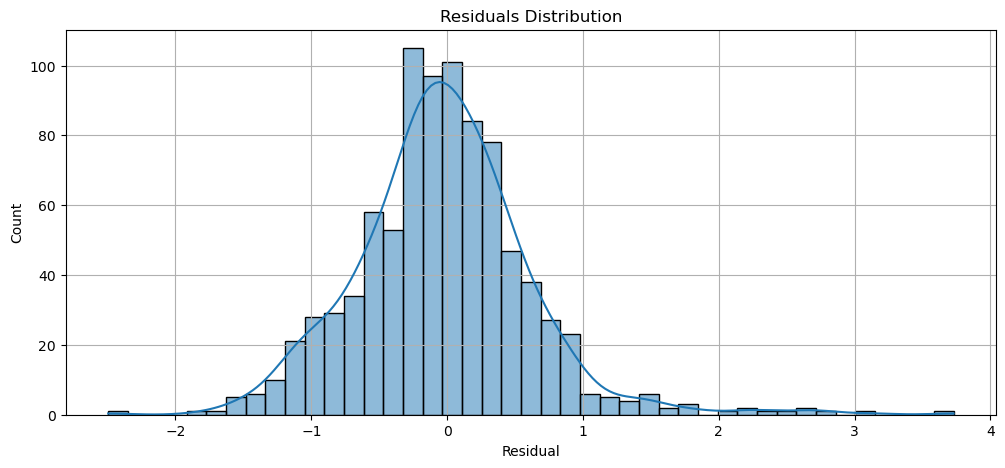

In [32]:
# Residual Plot

residuals = y_test - y_pred
plt.figure(figsize=(12, 5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.grid(True)
plt.show()

# The model explains around 51% of the variance, which is acceptable for real-world regression problems.

# The average error is 0.47 to 0.64 units, which shows decent accuracy.

# Residuals are normally distributed with no major issues, suggesting a reliable and well-behaved model.